# Implementing an one hidden layer Neural Network


![one_layer_network](../images/one_layer_network.png)


We will illustrate how to create a one hidden layer NN.

We will use the iris data for this exercise.

We will build a one-hidden layer neural network  to predict the fourth attribute, Petal Width from the other three (Sepal length, Sepal width, Petal length).

## Load configuration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from tensorflow.python.framework import ops
import pandas as pd

/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/parrondo/anaconda3/envs/deeptrading/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Ingest raw data

In [2]:
# Before getting into pandas dataframes we will load an example dataset from sklearn library 
# type(data) #iris is a bunch instance which is inherited from dictionary
data = load_iris() #load iris dataset



data = load_iris()

# We get a pandas dataframe to better visualize the datasets
df = pd.DataFrame(data.data, columns=data.feature_names)

X_raw = np.array([x[0:3] for x in data.data])
y_raw = np.array([x[3] for x in data.data])

# Dimensions of dataset
print("Dimensions of dataset")
n = X_raw.shape[0]
p = X_raw.shape[1]
print("n=",n,"p=",p)


Dimensions of dataset
n= 150 p= 3


In [3]:
data.keys() #keys of the dictionary

dict_keys(['DESCR', 'data', 'target', 'feature_names', 'target_names'])

In [4]:
X_raw.shape # Array 150x3. Each element is a 3-dimensional data point: sepal length, sepal width, petal length

(150, 3)

In [5]:
y_raw.shape # Vector 150. Each element is a 1-dimensional (scalar) data point: petal width

(150,)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Basic pre-process data

In [7]:
#
# Leave in blanck intentionally
#

## Split data

In [8]:
# split into train and test sets

# Total samples
nsamples = n

# Splitting into train (70%) and test (30%) sets
split = 70 # training split% ; test (100-split)%
jindex = nsamples*split//100 # Index for slicing the samples

# Samples in train
nsamples_train = jindex

# Samples in test
nsamples_test = nsamples - nsamples_train
print("Total number of samples: ",nsamples,"\nSamples in train set: ", nsamples_train,
      "\nSamples in test set: ",nsamples_test)

# Here are train and test samples
X_train = X_raw[:jindex, :]
y_train = y_raw[:jindex]

X_test = X_raw[jindex:, :]
y_test = y_raw[jindex:]

print("X_train.shape = ", X_train.shape, "y_train.shape =", y_train.shape, "\nX_test.shape =  ",
      X_test.shape, "y_test.shape = ", y_test.shape)


Total number of samples:  150 
Samples in train set:  105 
Samples in test set:  45
X_train.shape =  (105, 3) y_train.shape = (105,) 
X_test.shape =   (45, 3) y_test.shape =  (45,)


## Transform features

**Note**

Becareful not to write `X_test_std = sc.fit_transform(X_test)` instead of `X_test_std = sc.transform(X_test)`. In this case, it wouldn't make a great difference since the mean and standard deviation of the test set should be (quite) similar to the training set. However, this is not always the case in Forex market data, as has been well stablished in literature. The correct way is to re-use parameters from the training set if we are doing any kind of transformation. So, the test set should basically stand for "new, unseen" data.


In [9]:
# Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_std = sc.fit_transform(y_train.reshape(-1, 1))
y_test_std = sc.transform(y_test.reshape(-1, 1))

## Implement the model

In [10]:
# Clears the default graph stack and resets the global default graph
ops.reset_default_graph()


In [11]:
# make results reproducible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)  

# Initialize hyperparameters
n_features = X_train.shape[1]#  Number of features in training data
print("Number of featuress in training data: ", n_features)

batch_size = 50

# Placeholders
print("Placeholders")
X = tf.placeholder(dtype=tf.float32, shape=[None, n_features], name="X")
y = tf.placeholder(dtype=tf.float32, shape=[None,1], name="y")

# Initializers
print("Initializers")
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()


Number of featuress in training data:  3
Placeholders
Initializers


In [12]:
# Dimensions of the layers (aka layer nodes, neurons)(See figure of the model)
d0 = D = n_features # Layer 0 (Input layer)
d1 = 10 # Layer 1 (Hidden layer 1). Selected 10 for this example
d2 = C = 1 # Layer 2 (Output layer)

print("d0 =", d0, "d1 =", d1, "d2 =", d2)

# Create variables for NN layers
W1 = tf.Variable(weight_initializer([n_features, d1]), name="W1") # inputs -> hidden neurons
bias1 = tf.Variable(bias_initializer([d1]), name="bias1") # one biases for each hidden neurons
W2 = tf.Variable(weight_initializer([d1, d2]), name="W2") # hidden inputs -> 1 output
bias2 = tf.Variable(bias_initializer([d2]), name="bias2") # 1 bias for the output

# Construct model
hidden_output = tf.nn.relu(tf.add(tf.matmul(X, W1), bias1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, W2), bias2))

# Define loss function (MSE)
loss = tf.reduce_mean(tf.square(y - final_output))

# Define optimizer
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()


d0 = 3 d1 = 10 d2 = 1


In [13]:
W1

<tf.Variable 'W1:0' shape=(3, 10) dtype=float32_ref>

## Train the model  and Evaluate the model

In [14]:
# Create graph session 
sess = tf.Session()

# Writer to record image, scalar, histogram and graph for display in tensorboard
writer = tf.summary.FileWriter("/tmp/tensorflow_logs", sess.graph)

sess.run(init)

# Training loop
train_loss = []
test_loss = []
for i in range(1000):
    rand_index = np.random.choice(len(X_train), size=batch_size)
    X_rand = X_train[rand_index]
    y_rand = np.transpose([y_train[rand_index]])
    sess.run(train_step, feed_dict={X: X_rand, y: y_rand})

    train_temp_loss = sess.run(loss, feed_dict={X: X_rand, y: y_rand})
    train_loss.append(np.sqrt(train_temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={X: X_test, y: np.transpose([y_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(train_temp_loss))

writer.flush()
writer.close()


Generation: 50. Loss = 0.5993827
Generation: 100. Loss = 0.20065285
Generation: 150. Loss = 0.0820705
Generation: 200. Loss = 0.046969157
Generation: 250. Loss = 0.033277217
Generation: 300. Loss = 0.02950992
Generation: 350. Loss = 0.046582703
Generation: 400. Loss = 0.0514072
Generation: 450. Loss = 0.08004641
Generation: 500. Loss = 0.032044422
Generation: 550. Loss = 0.028484538
Generation: 600. Loss = 0.030885572
Generation: 650. Loss = 0.05383757
Generation: 700. Loss = 0.030355027
Generation: 750. Loss = 0.030203044
Generation: 800. Loss = 0.021480566
Generation: 850. Loss = 0.011752291
Generation: 900. Loss = 0.040840883
Generation: 950. Loss = 0.03590777
Generation: 1000. Loss = 0.042663313


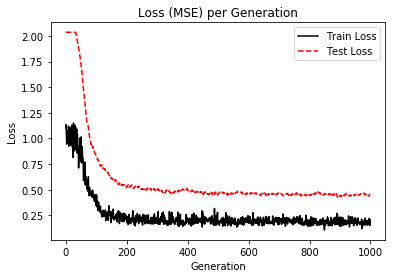

In [15]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(train_loss, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

### Tensorboard Graph


What follows is the graph we have executed and all data about it.


![graph_2](../images/graph_2.png)


## Predict

In [16]:
#
# Leave in blanck intentionally
#